In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import itertools

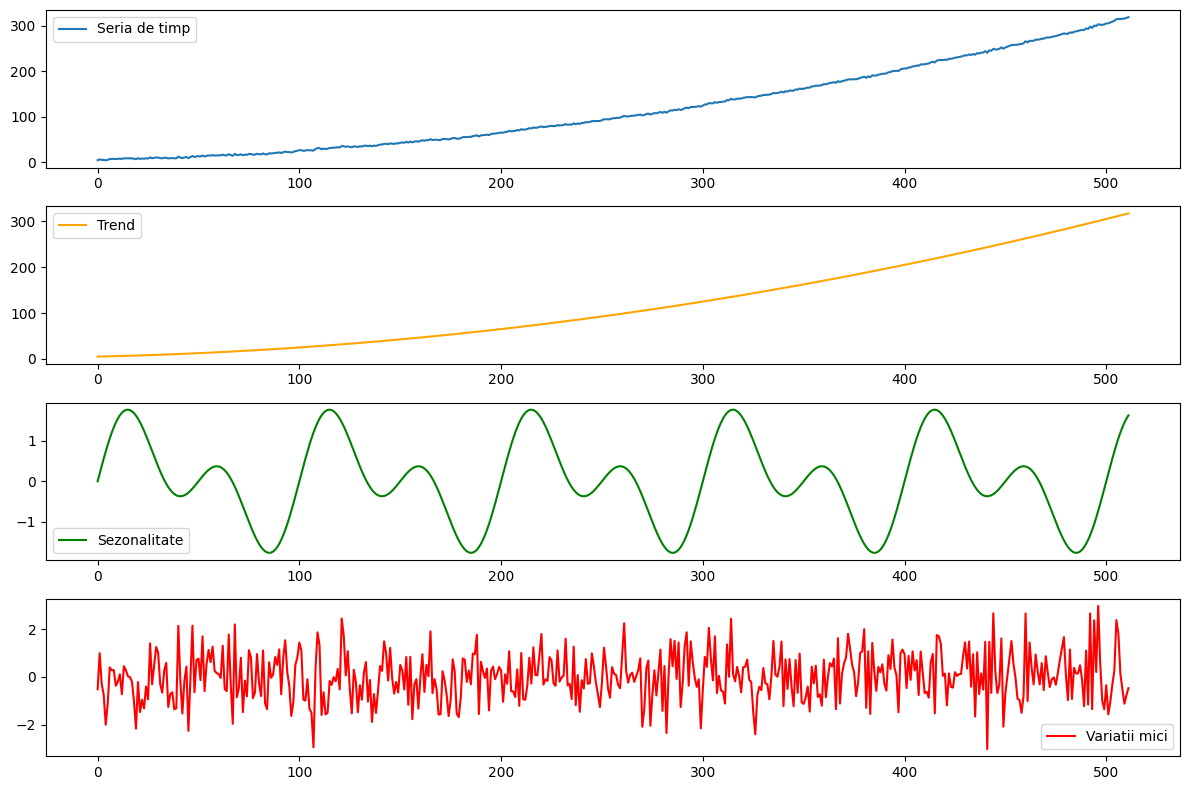

In [8]:
N = 512
t = np.arange(N)  

a, b, c = 0.001, 0.1, 5
trend = a * t**2 + b * t + c

freq1, freq2 = 1/50, 1/100 
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

variances = np.random.normal(0, 1, N)

time_series = trend + season + variances

fig, axs = plt.subplots(4, 1, figsize=(12, 8))

axs[0].plot(t, time_series, label='Seria de timp')
axs[0].legend()

axs[1].plot(t, trend, label='Trend', color='orange')
axs[1].legend()

axs[2].plot(t, season, label='Sezonalitate', color='green')
axs[2].legend()

axs[3].plot(t, variances, label='Variatii mici', color='red')
axs[3].legend()

plt.tight_layout()
plt.show()

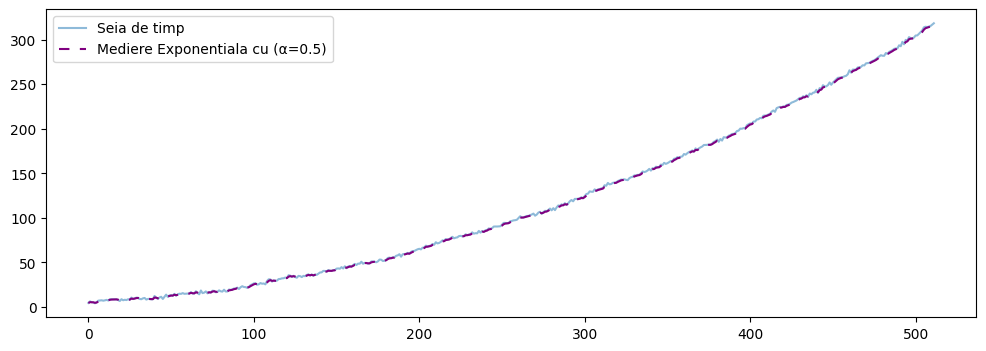

In [9]:
def mediere_exp(series, alpha):
    exp_avg = np.zeros_like(series)
    exp_avg[0] = series[0]
    for i in range(1, len(series)):
        exp_avg[i] = alpha * series[i] + (1 - alpha) * exp_avg[i - 1]
    return exp_avg

alpha = 0.5
exp_avg_series = mediere_exp(time_series, alpha)

fig_exp, ax_exp = plt.subplots(figsize=(12, 4))
ax_exp.plot(t, time_series, label='Seia de timp', alpha=0.5)
ax_exp.plot(t, exp_avg_series, label=f'Mediere Exponentiala cu (α={alpha})', color='purple', linestyle='--', dashes=(5, 5))
ax_exp.legend()
plt.show()

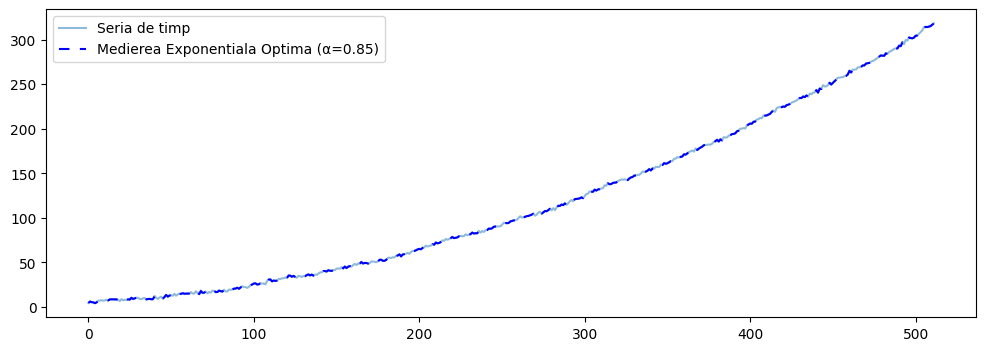

0.8484848484848485

In [10]:
alphas = np.linspace(0, 1, 100)  
mse_values = []

for alpha in alphas:
    exp_avg = mediere_exp(time_series, alpha)
    mse = mean_squared_error(time_series[1:], exp_avg[:-1])
    mse_values.append(mse)

optimal_alpha = alphas[np.argmin(mse_values)]
optimal_exp_avg = mediere_exp(time_series, optimal_alpha)

fig_opt, ax_opt = plt.subplots(figsize=(12, 4))
ax_opt.plot(t, time_series, label='Seria de timp', alpha=0.5)
ax_opt.plot(t, optimal_exp_avg, label=f'Medierea Exponentiala Optima (α={optimal_alpha:.2f})', color='blue', linestyle='--', dashes=(5, 5))
ax_opt.legend()
plt.show()

optimal_alpha

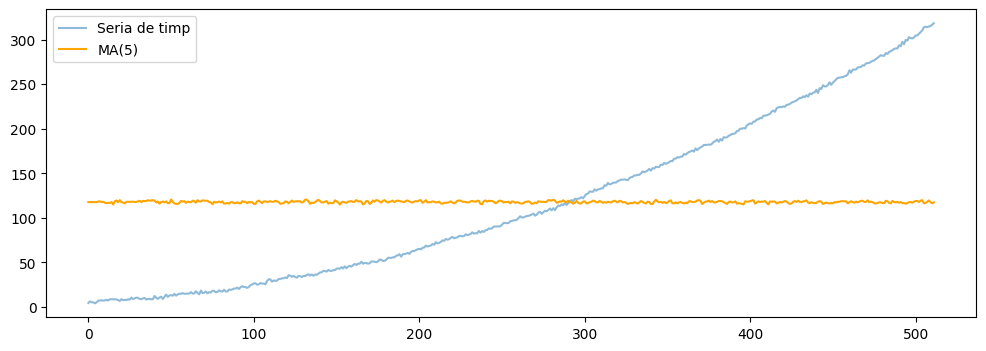

In [11]:
# o incercare de model de ma, nu inteleg daca trebuia facut manual
q = 5

estimated_mean = np.mean(time_series)

theta1 = 0.5

errors = np.random.normal(0, 1, N)

ma_series = np.full(N, estimated_mean)

for i in range(q, N):
    ma_series[i] += theta1 * errors[i - 1] + errors[i]

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t, time_series, label='Seria de timp', alpha=0.5)
ax.plot(t, ma_series, label=f'MA({q})', color='orange')
ax.legend()
plt.show()

In [12]:
p_bound = 20
q_bound = 20

pq_combinations = list(itertools.product(range(p_bound + 1), range(q_bound + 1)))

best_aic = float('inf')
best_pq = None
best_model = None

for p, q in pq_combinations:
    try:
        model = ARIMA(time_series, order=(p, 0, q))
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_pq = (p, q)
            best_model = results
    except Exception as e:
        continue  

best_pq, best_model.summary()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

((3, 3),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                      y   No. Observations:                  512
 Model:                 ARIMA(3, 0, 3)   Log Likelihood                   0.000
 Date:                Wed, 20 Dec 2023   AIC                             16.000
 Time:                        01:39:57   BIC                             49.907
 Sample:                             0   HQIC                            29.291
                                 - 512                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        119.8737      0.000   6.02e+05      0.000     119.873     119.874
 ar.L1          0.9999        nan        nan        nan      